In [18]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet

In [19]:
# establish file paths
# aura = Path('data/Sales_Aura.xls')
# ben = Path('data/Sales_Ben.xls')
# regal = Path('data/Sales_Regal.xls')
# ultra = Path('data/Sales_Ultraspec.xls')
# aura_mod = Path('data/Sales_Aura_remod.xls')
# full = Path('data/Sales_AllStores_ABRU.xlsx')
waco_path = Path('data/waco_full.xls')
all_stores_path = Path('data/allStores_2007toPresent.xls')
all_store2_path = Path('data/allStores_2007toPresent2.xls')
all_store3_path = Path('data/allStores_2007toPresent3.xls')

In [20]:
# first iteration
all_store_data = pd.read_excel(all_stores_path)
all_store_data.head(25)

,Year,Month,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,November,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,NaN,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,NaN,December,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,NaN,NaN,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133
5,NaN,NaN,51.0,NaN,NaN,NaN,NaN,7291.96,250,NaN,NaN,NaN,NaN,7291.96,250
6,NaN,NaN,52.0,NaN,NaN,NaN,NaN,12813.24,313,NaN,NaN,NaN,NaN,12813.24,313
7,NaN,NaN,53.0,NaN,NaN,NaN,NaN,191.8,3,NaN,NaN,NaN,NaN,191.8,3
8,2008,January,1.0,NaN,NaN,NaN,NaN,1838.45,60,NaN,NaN,NaN,NaN,1838.45,60
9,NaN,NaN,2.0,NaN,NaN,NaN,NaN,5866.86,177,NaN,NaN,NaN,NaN,5866.86,177


In [21]:
# second iteration
all_store2_data = pd.read_excel(all_store2_path)
all_store2_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,NaN,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,NaN,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [22]:
all_store3_data = pd.read_excel(all_store3_path)
all_store3_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2007,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,2007,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,2007,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [23]:
all_store3_data.tail()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,2024,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,2024,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,2024,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,2024,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


In [24]:
store3_data = all_store3_data[['Year', 'Week', 'store 003', 'store 003.1']]
store3_data = store3_data.drop(index=0)
store3_data = store3_data.drop(index=994)
store3_data.head()
renamed_store3_data = store3_data.rename(columns={'store 003': 'Sales', 'store 003.1': 'Gallons'})
# this one!
renamed_store3_data.head()

,Year,Week,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133
5,2007,51.0,7291.96,250


In [25]:
renamed_store3_data.tail()

,Year,Week,Sales,Gallons
989,2024,18.0,15687.08,256
990,2024,19.0,26200.68,492
991,2024,20.0,24729.34,473
992,2024,21.0,27596.85,571
993,2024,22.0,18877.38,281


In [26]:
renamed_store3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 1 to 993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     993 non-null    object 
 1   Week     992 non-null    float64
 2   Sales    991 non-null    object 
 3   Gallons  990 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [27]:
total_data = all_store3_data[['Year', 'Week', 'Total Sales', 'Total gallons']]
total_data.head()

,Year,Week,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133


In [28]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           994 non-null    object 
 1   Week           992 non-null    float64
 2   Total Sales    995 non-null    object 
 3   Total gallons  993 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [29]:
all_store_data.tail()

,Year,Month,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,NaN,NaN,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,NaN,NaN,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,NaN,NaN,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,NaN,NaN,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


In [33]:
# Following cells are my work

In [48]:
# Import and read file 
store3_path = Path("data/new_renamed_store3_data.csv")
store3_final_df = pd.read_csv(store3_path)

store3_final_df.head()


,Year,Week,Monthn,Sales,Gallons,date
0,2007,47,11,0.00,NaN,2007-11-19
1,2007,48,11,4697.64,148.0,2007-11-26
2,2007,49,12,3233.57,88.0,2007-12-03
3,2007,50,12,4526.86,133.0,2007-12-10
4,2007,51,12,7291.96,250.0,2007-12-17


In [35]:
# Verify Data types in data frame
store3_final_df.dtypes

Year         int64
Week         int64
Monthn       int64
Sales      float64
Gallons    float64
date        object
dtype: object

In [36]:
# Set the "date" column to datetime format
store3_final_df['date'] = pd.to_datetime(store3_final_df['date'])

In [37]:
# Set index 
store3_final_df.set_index('date', inplace=True)

In [38]:
# display first few rows
print(store3_final_df.head())

            Year  Week  Monthn    Sales  Gallons
date                                            
2007-11-19  2007    47      11     0.00      NaN
2007-11-26  2007    48      11  4697.64    148.0
2007-12-03  2007    49      12  3233.57     88.0
2007-12-10  2007    50      12  4526.86    133.0
2007-12-17  2007    51      12  7291.96    250.0


In [39]:
store3_final_df = store3_final_df[~store3_final_df.index.duplicated(keep='first')]

## ARIMA

In [40]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test to check for stationarity
result = adfuller(store3_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -0.6574012564881112
p-value: 0.8574772600130671
The time series is not stationary.


# since the time series is not stationary, differencing will be applied and ADF test performed again.

In [41]:
# Apply differencing
store3_final_df['Sales_diff'] = store3_final_df['Sales'].diff().dropna()

In [42]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store3_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -12.902736964456443
Differenced p-value: 4.2145839606466576e-24
The differenced time series is stationary.


# SUCCESS...I think...

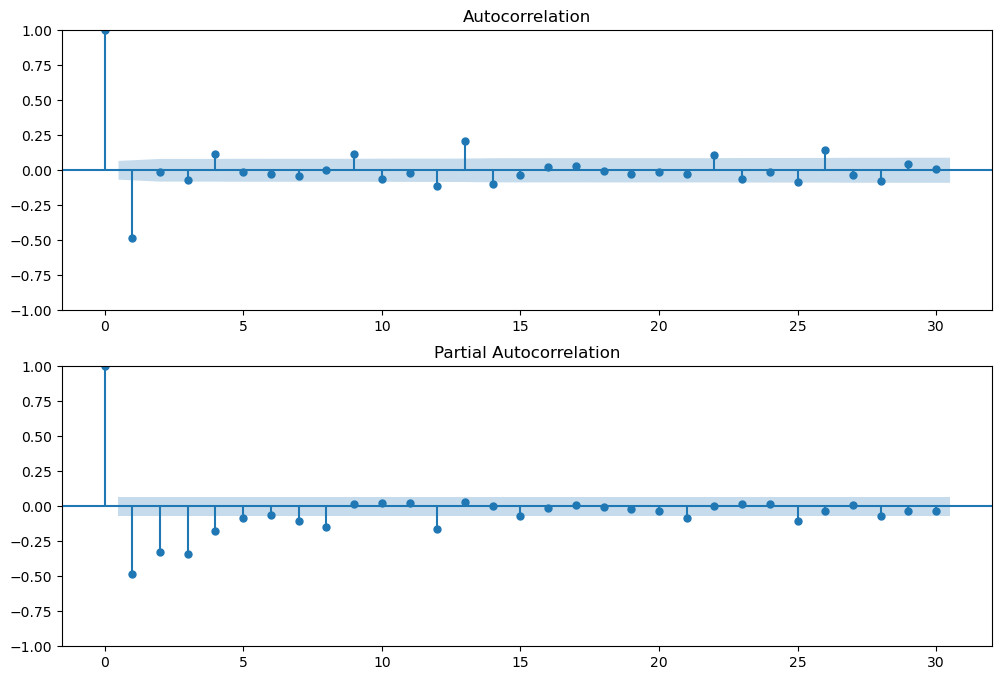

In [43]:
# Generate ACF and PACF plots.
# import tools to plot the above
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store3_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store3_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()


In [44]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store3_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8231.570
Date:                Sun, 09 Jun 2024   AIC                          16469.140
Time:                        10:28:53   BIC                          16483.415
Sample:                             0   HQIC                         16474.605
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0258      0.039     -0.658      0.511      -0.103       0.051
ma.L1         -0.8460      0.017    -50.811      0.000      -0.879      -0.813
sigma2      1.284e+07   3.04e-10   4.23e+16      0.0

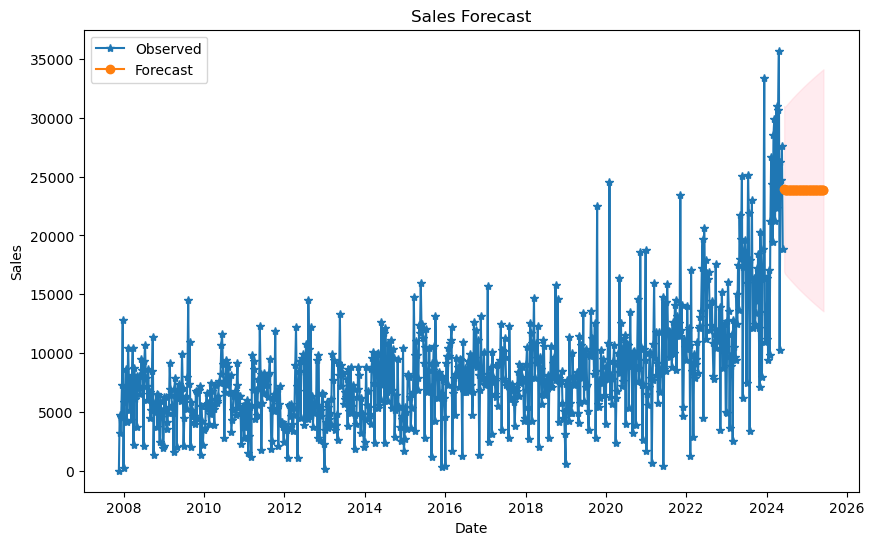

In [45]:

# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store3_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



# Store 1

In [47]:
# Import and read file 
store1_path = Path("data/store1_data.csv")
store1_final_df = pd.read_csv(store1_path)

store1_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [49]:
# Verify Data types in data frame
store1_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [50]:
# Set the "date" column to datetime format
store1_final_df['date'] = pd.to_datetime(store1_final_df['date'])

In [51]:
# Set index 
store1_final_df.set_index('date', inplace=True)

In [52]:
# display first few rows
print(store1_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [53]:
# Repeating this step to avoid error that was coming up while trying to difference
store1_final_df = store1_final_df[~store1_final_df.index.duplicated(keep='first')]

# ARIMA for Store 1

In [73]:
# Perform the ADF test to check for stationarity
result = adfuller(store1_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -10.47210579042704
p-value: 1.276417926893067e-18
The time series is stationary.


# Stationary after first ADF test, differencing not necessary

In [71]:
# Apply differencing
#store1_final_df['Sales_diff'] = store1_final_df['Sales'].diff().dropna()

In [72]:
# Perform ADF test on the differenced series
#differenced_adf = adfuller(store1_final_df['Sales_diff'].dropna())
#print("Differenced ADF Statistic:", differenced_adf[0])
#print("Differenced p-value:", differenced_adf[1])

#if differenced_adf[1] <= 0.05:
    #print("The differenced time series is stationary.")

Differenced ADF Statistic: -11.20454323793714
Differenced p-value: 2.201392339577934e-20
The differenced time series is stationary.


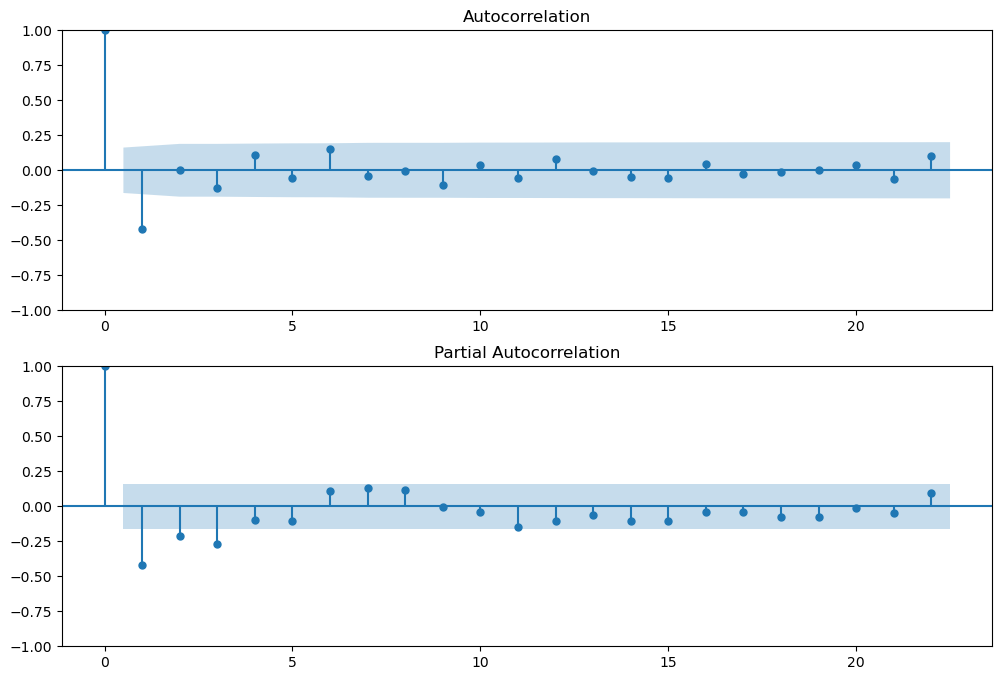

In [74]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store1_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store1_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

In [75]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store1_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1765.390
Date:                Sun, 09 Jun 2024   AIC                           3536.779
Time:                        10:52:06   BIC                           3551.054
Sample:                             0   HQIC                          3542.244
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1400      0.107      1.309      0.191      -0.070       0.350
ma.L1         -0.9503      0.050    -19.162      0.000      -1.047      -0.853
sigma2      9.673e+08    4.7e-11   2.06e+19      0.0

# Reminder to look up and research warnings for presentation

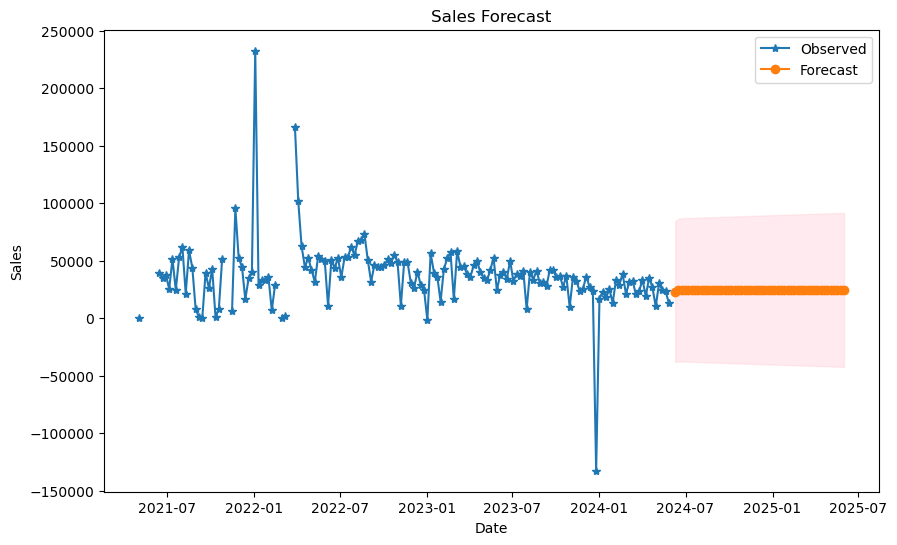

In [76]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store1_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store1_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Some volatility may exist here...

# Store 2

In [62]:
# Import and read file 
store2_path = Path("data/store2_data.csv")
store2_final_df = pd.read_csv(store2_path)

store2_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [63]:
# Verify Data types in data frame
store2_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [64]:
# Set the "date" column to datetime format
store2_final_df['date'] = pd.to_datetime(store2_final_df['date'])

In [66]:
# Set index 
store2_final_df.set_index('date', inplace=True)

In [67]:
# display first few rows
print(store2_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [69]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store2_final_df = store2_final_df[~store2_final_df.index.duplicated(keep='first')]

# ARIMA for Store 2

In [77]:
# Perform the ADF test to check for stationarity
result = adfuller(store2_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.7803732266893886
p-value: 0.06113246540208437
The time series is not stationary.


# Not stationary, run differencing.

In [78]:
# Apply differencing
store2_final_df['Sales_diff'] = store2_final_df['Sales'].diff().dropna()

In [79]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store2_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.591018075380598
Differenced p-value: 7.114426107445535e-09
The differenced time series is stationary.


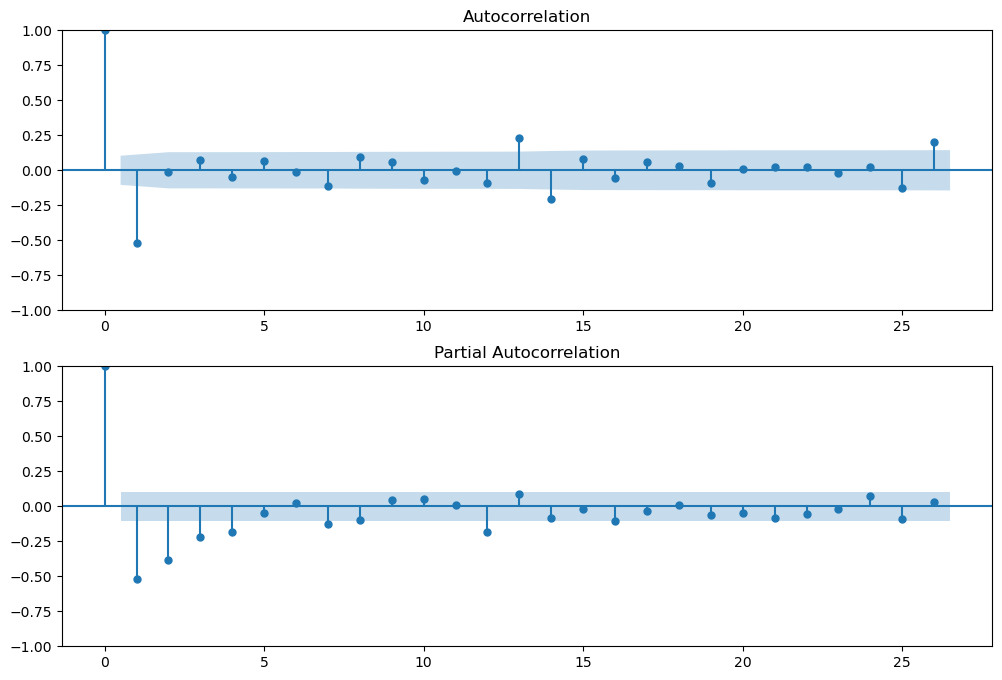

In [80]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store2_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store2_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

In [81]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store2_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3517.681
Date:                Sun, 09 Jun 2024   AIC                           7041.362
Time:                        10:56:52   BIC                           7055.636
Sample:                             0   HQIC                          7046.826
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1067      0.055     -1.942      0.052      -0.214       0.001
ma.L1         -0.7641      0.034    -22.711      0.000      -0.830      -0.698
sigma2      2.111e+07   7.69e-10   2.75e+16      0.0

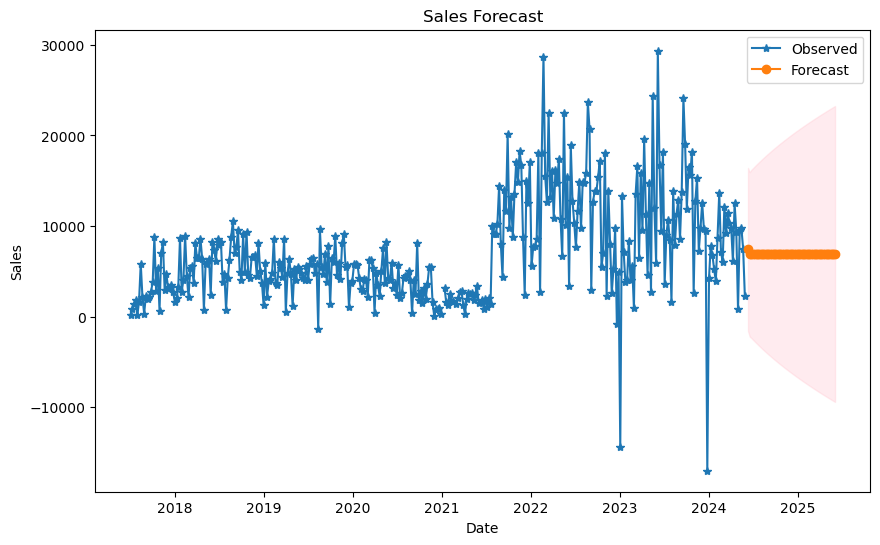

In [82]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store2_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store2_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Analysis to go here:

# Store 4 (Reminder Store 3 was done first)

In [83]:
# Import and read file 
store4_path = Path("data/store4_data.csv")
store4_final_df = pd.read_csv(store4_path)

store4_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [84]:
# Verify Data types in data frame
store4_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [85]:
# Set the "date" column to datetime format
store4_final_df['date'] = pd.to_datetime(store4_final_df['date'])

In [86]:
# Set index 
store4_final_df.set_index('date', inplace=True)

In [87]:
# display first few rows
print(store4_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


# Reminder...NaN values because this store did not exist in 2007, same with Stores 1 and 2

In [88]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store4_final_df = store4_final_df[~store4_final_df.index.duplicated(keep='first')]

# ARIMA for Store 4

In [89]:
# Perform the ADF test to check for stationarity
result = adfuller(store4_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.2540743485240706
p-value: 0.18720775384143068
The time series is not stationary.


# Not stationary, run differencing

In [90]:
# Apply differencing
store4_final_df['Sales_diff'] = store4_final_df['Sales'].diff().dropna()

In [92]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store4_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.689644081958729
Differenced p-value: 4.1407562655967995e-09
The differenced time series is stationary.


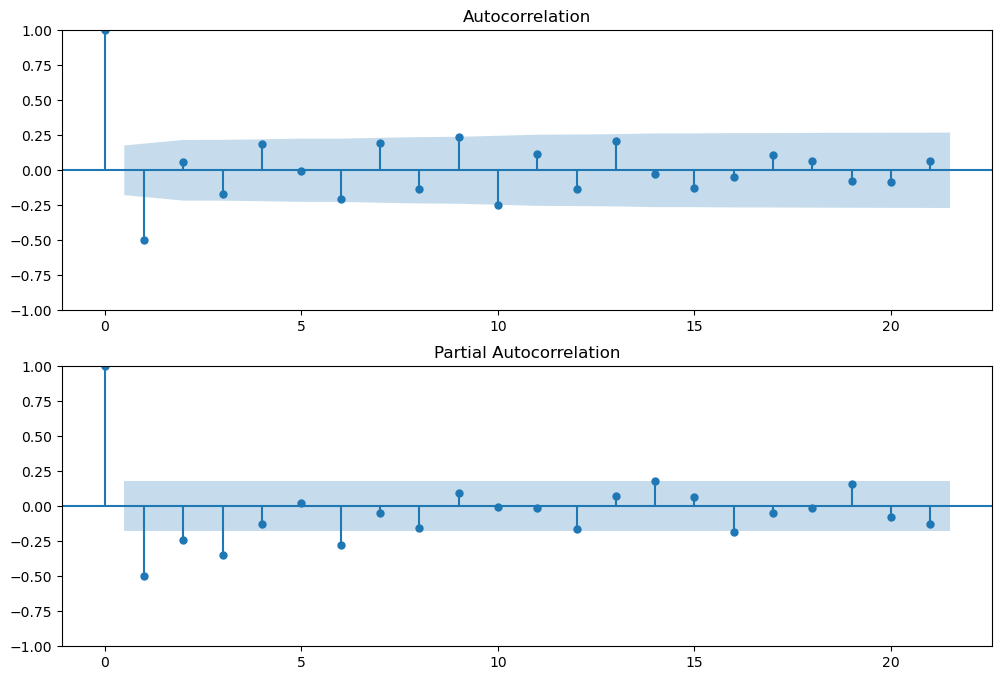

In [93]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store4_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store4_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

In [94]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store4_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1096.852
Date:                Sun, 09 Jun 2024   AIC                           2199.704
Time:                        11:09:44   BIC                           2213.979
Sample:                             0   HQIC                          2205.169
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0668      0.117      0.572      0.567      -0.162       0.296
ma.L1         -0.8859      0.049    -18.182      0.000      -0.981      -0.790
sigma2      3.438e+06   4.74e+05      7.258      0.0

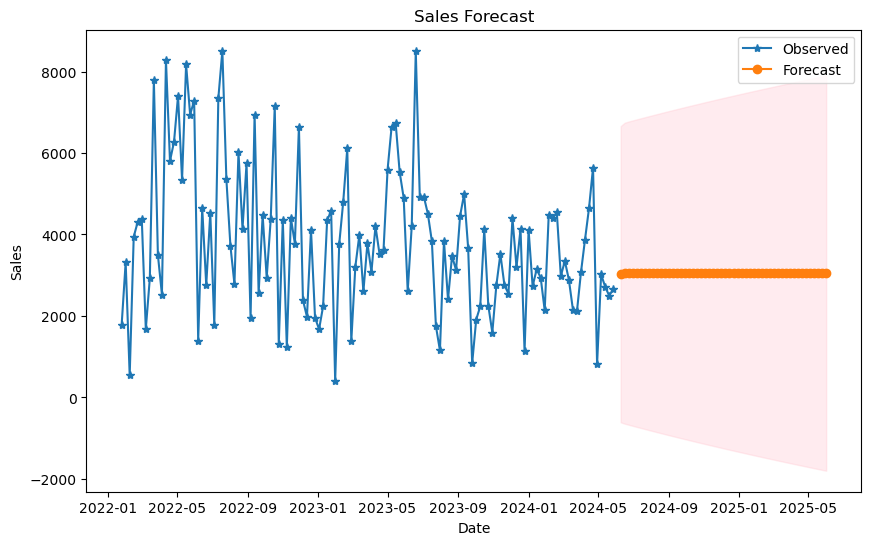

In [95]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store4_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store4_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Analysis here:

# Store 5

In [96]:
# Import and read file 
store5_path = Path("data/store5_data.csv")
store5_final_df = pd.read_csv(store5_path)

store5_final_df.head()

,date,Sales,Gallons
0,2007-11-19,NaN,NaN
1,2007-11-26,NaN,NaN
2,2007-12-03,NaN,NaN
3,2007-12-10,NaN,NaN
4,2007-12-17,NaN,NaN


In [97]:
# Verify Data types in data frame
store5_final_df.dtypes

date        object
Sales      float64
Gallons    float64
dtype: object

In [98]:
# Set the "date" column to datetime format
store5_final_df['date'] = pd.to_datetime(store5_final_df['date'])

In [99]:
# Set index 
store5_final_df.set_index('date', inplace=True)

In [100]:
# display first few rows
print(store5_final_df.head())

            Sales  Gallons
date                      
2007-11-19    NaN      NaN
2007-11-26    NaN      NaN
2007-12-03    NaN      NaN
2007-12-10    NaN      NaN
2007-12-17    NaN      NaN


In [101]:
# Repeating this step to avoid error that was coming up while trying to difference, again for consistency
store5_final_df = store5_final_df[~store5_final_df.index.duplicated(keep='first')]

# ARIMA Store 5

In [102]:
# Perform the ADF test to check for stationarity
result = adfuller(store5_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.42665207540503
p-value: 0.13435490718659748
The time series is not stationary.


# Not stationary, run differencing

In [103]:
# Apply differencing
store5_final_df['Sales_diff'] = store5_final_df['Sales'].diff().dropna()

In [104]:
# Perform ADF test on the differenced series
differenced_adf = adfuller(store5_final_df['Sales_diff'].dropna())
print("Differenced ADF Statistic:", differenced_adf[0])
print("Differenced p-value:", differenced_adf[1])

if differenced_adf[1] <= 0.05:
    print("The differenced time series is stationary.")

Differenced ADF Statistic: -6.051219862277166
Differenced p-value: 1.2762187105689469e-07
The differenced time series is stationary.


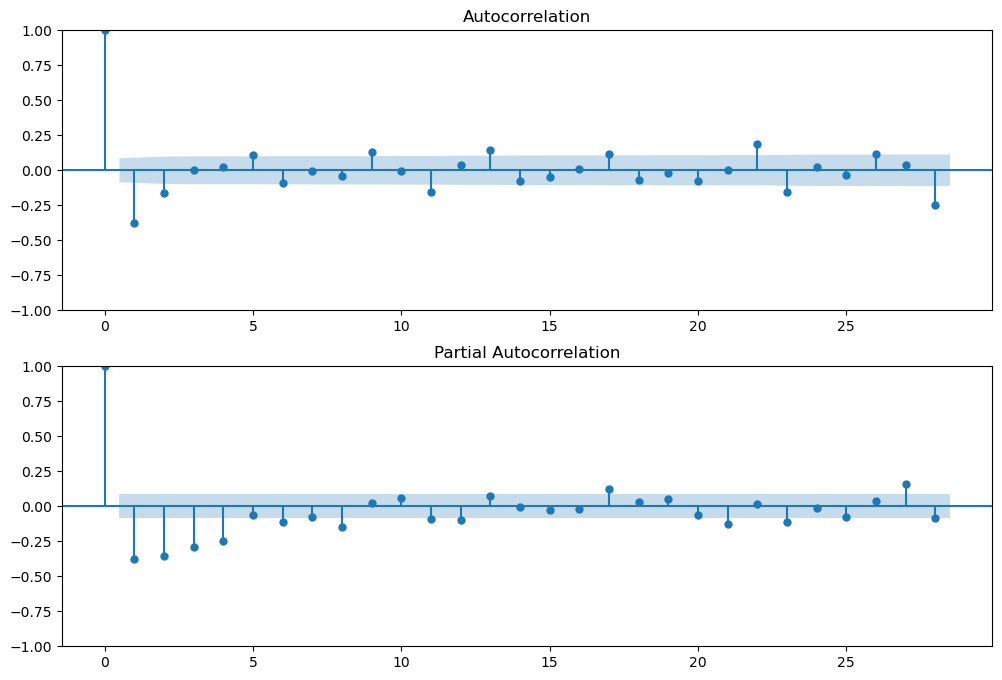

In [105]:
# Generate ACF and PACF plots.

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(store5_final_df['Sales_diff'].dropna(), ax=ax[0])
plot_pacf(store5_final_df['Sales_diff'].dropna(), ax=ax[1])
plt.show()

In [106]:
warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here I use p=1, d=1 (denotes first differencing), q=1 as an example. I might need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store5_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  862
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5026.783
Date:                Sun, 09 Jun 2024   AIC                          10059.566
Time:                        11:19:25   BIC                          10073.841
Sample:                             0   HQIC                         10065.031
                                - 862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0572      0.044      1.310      0.190      -0.028       0.143
ma.L1         -0.8083      0.024    -33.600      0.000      -0.855      -0.761
sigma2      1.394e+07   8.13e-10   1.72e+16      0.0

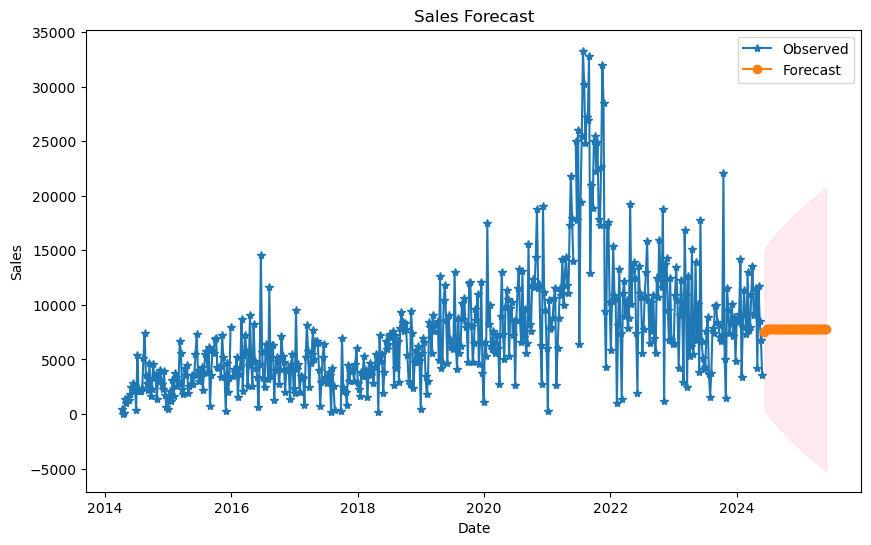

In [107]:
# Forecast future values
forecast_steps = 52  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store5_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store5_final_df['Sales'], label='Observed', marker='*')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Analysis here